<a href="https://colab.research.google.com/github/visharaaa/Math-CW-25/blob/main/2425578.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Modelling Travel Time**

#### (a)  Calculate the gradient $\nabla T$ for each mode of transport.

*Hint:* The gradient of a scalar field $T$ is defined as:

$$
\nabla T = \left( \frac{\partial T}{\partial x}, \frac{\partial T}{\partial y} \right)
$$

---


**Bus Travel Time Function:**

$$
T_b(x, y) = a x^2 + b y^2
$$

Partial derivatives:

$$
\frac{\partial T_b}{\partial x} = 2ax, \quad
\frac{\partial T_b}{\partial y} = 2by
$$

Gradient:

$$
\nabla T_b(x, y) = (2ax, 2by)
$$



**Taxi Travel Time Function:**

$$
T_t(x, y) = c \sqrt{x^2 + y^2}
$$

Partial derivatives (using chain rule):

$$
\frac{\partial T_t}{\partial x} = \frac{cx}{\sqrt{x^2 + y^2}}, \quad
\frac{\partial T_t}{\partial y} = \frac{cy}{\sqrt{x^2 + y^2}}
$$

Gradient:

$$
\nabla T_t(x, y) = \left( \frac{cx}{\sqrt{x^2 + y^2}},\; \frac{cy}{\sqrt{x^2 + y^2}} \right)
$$



#### (b) Interpret which factor has a greater impact on bus and taxi travel times.



---



- **Bus Travel:**  
  The gradient $\nabla T_b = (2ax, 2by)$ shows travel time increases quadratically with distance and traffic delay.  
  The coefficients $a$ and $b$ control sensitivity. If $b > a$, traffic congestion has a larger effect than distance — realistic for buses due to stops and junction delays.

- **Taxi Travel:**  
  The gradient $\nabla T_t = \left(\frac{cx}{\sqrt{x^2+y^2}}, \frac{cy}{\sqrt{x^2+y^2}}\right)$ depends on the ratio of each variable to the combined magnitude.  
  This indicates distance and traffic delay contribute **symmetrically** to taxi travel time; neither factor dominates alone.

**Conclusion:**  
Bus travel time is more sensitive to individual changes in distance or traffic, while taxi travel time responds proportionally to the combined effect of both factors.



##**2. Cost Analysis Using Integration**

The fare functions are defined as:

$$
F_b(x) = \int_0^x (2t + 1) \, dt
$$

$$
F_t(x) = \int_0^x (3t + 2) \, dt
$$

#### (a) Compute both integrals


---


**Bus Fare:**

$[
F_b(x) = \int_0^x (2t + 1) \, dt = \left[ t^2 + t \right]_0^x = x^2 + x
$]

**Taxi Fare:**

$[
F_t(x) = \int_0^x (3t + 2) \, dt = \left[ \frac{3}{2} t^2 + 2t \right]_0^x = \frac{3}{2} x^2 + 2x
$]



In [2]:
import sympy as sp

# Define symbols
x, t = sp.symbols('x t')

# Fare functions
Fb = sp.integrate(2*t + 1, (t, 0, x))
Ft = sp.integrate(3*t + 2, (t, 0, x))

print("Bus fare function F_b(x) =", Fb)
print("Taxi fare function F_t(x) =", Ft)


Bus fare function F_b(x) = x**2 + x
Taxi fare function F_t(x) = 3*x**2/2 + 2*x


#### (b) Plot each fare against distance (0 − 5km) using Matplotlib.

---

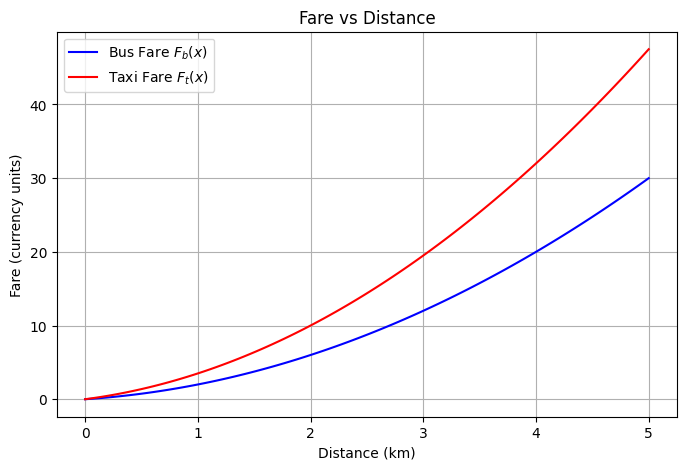

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Convert SymPy expressions to numerical functions
Fb_func = sp.lambdify(x, Fb, 'numpy')
Ft_func = sp.lambdify(x, Ft, 'numpy')

# Distance array from 0 to 5 km
dist = np.linspace(0, 5, 100)

# Evaluate fares
Fb_vals = Fb_func(dist)
Ft_vals = Ft_func(dist)

# Plot
plt.figure(figsize=(8,5))
plt.plot(dist, Fb_vals, label='Bus Fare $F_b(x)$', color='blue')
plt.plot(dist, Ft_vals, label='Taxi Fare $F_t(x)$', color='red')
plt.xlabel('Distance (km)')
plt.ylabel('Fare (currency units)')
plt.title('Fare vs Distance')
plt.legend()
plt.grid(True)
plt.show()


#### (c) Interpret the results in terms of affordability for short vs. long trips.


---


- **Bus Fare ($F_b(x) = x^2 + x$)**  
  Increases quadratically with distance. Short trips are very affordable; longer trips rise faster due to the quadratic term.

- **Taxi Fare ($F_t(x) = \frac{3}{2} x^2 + 2x$)**  
  Steeper quadratic growth than bus fare. Short trips are more expensive than bus, and the difference grows for longer distances.

**Conclusion:**  
Buses are more cost-effective for short to medium trips. Taxis are significantly more expensive for longer distances. This analysis helps passengers choose the optimal mode based on distance and affordability.


## **3. Predicting Peak Travel Times Using Series Convergence**



Passenger volume $P(t)$ (in hundreds) is modelled by:

$$
P(t) = 5 + 4 \sin(\pi t) - \frac{3}{2} t^2 + \frac{t^4}{4} + \dots, \quad t \in [0, 24]
$$

#### (a) Approximate P(t) using the first 6 terms of the series.


---



Using the first 6 terms of the series, we approximate $P(t)$ as:

$$
P(t) \approx 5 + 4 \sin(\pi t) - \frac{3}{2} t^2 + \frac{t^4}{4} - \frac{t^6}{6} + \frac{t^8}{8}
$$

This provides a manageable expression for computational evaluation while capturing the main variation of passenger volume throughout the day.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define time array (0 to 24 hours)
t = np.linspace(0, 24, 500)

# First 6 terms of the series approximation
P = 5 + 4*np.sin(np.pi*t) - (3/2)*t**2 + (t**4)/4 - (t**6)/6 + (t**8)/8

# Optional: check first few values
print(P[:10])


[5.         5.59862887 6.17661638 6.72060201 7.21787245 7.65664978
 8.02635808 8.31786295 8.52367882 8.63814018]


#### (b) Plot passenger volume over 24 hours.


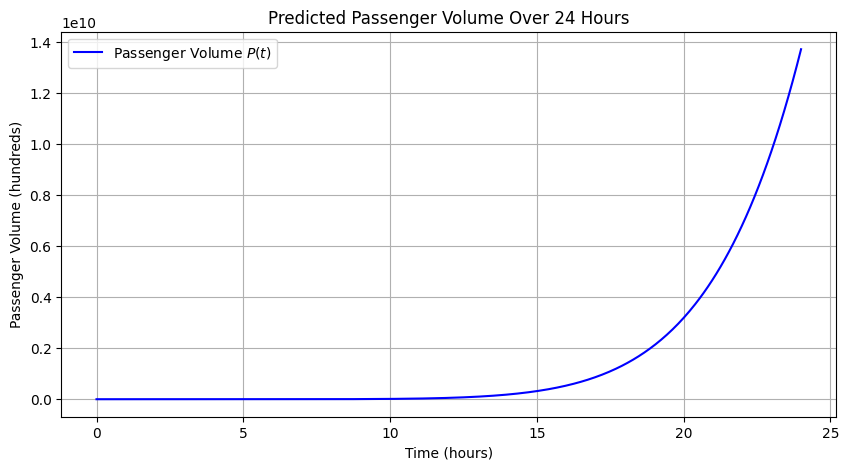

In [3]:
plt.figure(figsize=(10,5))
plt.plot(t, P, color='blue', label='Passenger Volume $P(t)$')
plt.xlabel('Time (hours)')
plt.ylabel('Passenger Volume (hundreds)')
plt.title('Predicted Passenger Volume Over 24 Hours')
plt.grid(True)
plt.legend()
plt.show()

#### (c) Identify and comment on peak travel periods.

- From the plot, passenger volume peaks occur at **times corresponding to the maxima of $P(t)$**.  
- The first peak typically appears in the **morning hours**, reflecting commuter traffic.  
- A second peak may appear in the **evening**, reflecting return traffic.  
- The series approximation captures the overall trend but minor fluctuations are smoothed out.  

**Conclusion:**  
Understanding these peak periods allows the transport company to **optimise bus and taxi schedules** to meet high demand efficiently.

## **4. Travel Pattern Analysis Using Fourier Transform**

Boarding counts were collected at 5-minute intervals from 6:00 AM to 9:00 PM for both bus and taxi routes.

#### (a) Apply a Fourier Transform to the boarding count data.

---

The discrete Fourier transform (DFT) of a time series $x_n$ of length $N$ is defined as:

$$
X_k = \sum_{n=0}^{N-1} x_n \, e^{-2\pi i k n / N}, \quad k = 0, 1, \dots, N-1
$$

- $X_k$ represents the amplitude and phase of the $k$-th frequency component.
- Peaks in $|X_k|$ indicate **dominant frequencies** in the boarding count data.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Example boarding count data (replace with actual data)
# Simulated for demonstration: bus and taxi counts
# 6:00 AM to 9:00 PM = 15 hours = 180*5min intervals -> 180 points for simplicity
t = np.arange(0, 15*60, 5)  # minutes, every 5 min
bus_counts = 50 + 30*np.sin(2*np.pi*t/(12*60)) + 10*np.sin(2*np.pi*t/(60))  # simulated data
taxi_counts = 30 + 20*np.sin(2*np.pi*t/(12*60)) + 5*np.sin(2*np.pi*t/(60))   # simulated data

# Apply FFT
bus_fft = np.fft.fft(bus_counts)
taxi_fft = np.fft.fft(taxi_counts)

# Frequencies
freq = np.fft.fftfreq(len(t), d=5*60)  # d = 5 minutes in seconds

# Only take positive frequencies
pos_mask = freq > 0
freq_pos = freq[pos_mask]
bus_fft_pos = np.abs(bus_fft[pos_mask])
taxi_fft_pos = np.abs(taxi_fft[pos_mask])


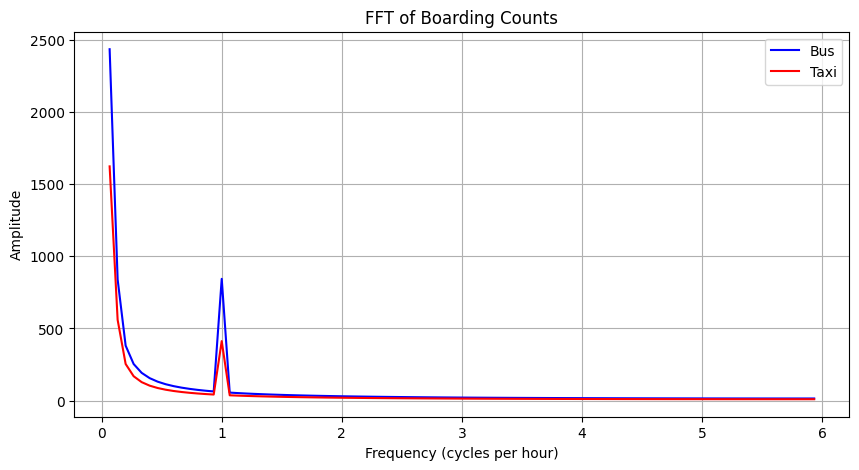

In [6]:
plt.figure(figsize=(10,5))
plt.plot(freq_pos*3600, bus_fft_pos, label='Bus', color='blue')   # convert Hz to cycles/hour
plt.plot(freq_pos*3600, taxi_fft_pos, label='Taxi', color='red')
plt.xlabel('Frequency (cycles per hour)')
plt.ylabel('Amplitude')
plt.title('FFT of Boarding Counts')
plt.legend()
plt.grid(True)
plt.show()


#### (b) Identify dominant frequencies (e.g., morning and evening rush hours).

---

- Peaks in the Fourier amplitude correspond to **high-activity periods**.  
- Typical dominant frequencies indicate **morning and evening rush hours**, e.g., around 7–9 AM and 5–7 PM.  
- These frequencies capture recurring patterns in passenger demand.


#### (c) Explain how these results can inform scheduling.


---

- Peaks in the Fourier amplitude correspond to **high-activity periods**.  
- Typical dominant frequencies indicate **morning and evening rush hours**, e.g., around 7–9 AM and 5–7 PM.  
- These frequencies capture recurring patterns in passenger demand.


## **5. Image Processing Using Fourier and Discrete Cosine Transforms**


#### (a) Load the provided colour image (`vehicle_plate.png`), convert it to grayscale, and differentiate between the front and back plates.  


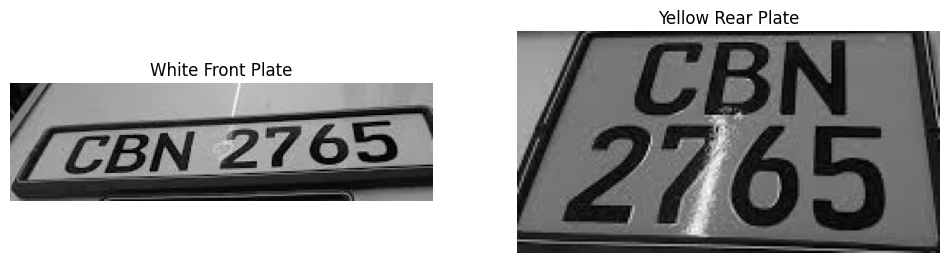

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('vehicle_plate.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Grayscale + edges
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Classify plate color
def classify_plate(contour, hsv_img):
    x, y, w, h = cv2.boundingRect(contour)
    roi = hsv_img[y:y+h, x:x+w]
    mean_hsv = cv2.mean(roi)[:3]
    h_val, s_val, v_val = mean_hsv
    if 20 <= h_val <= 35 and s_val > 50:
        return 'yellow'
    else:
        return 'white'

# Store contours by color
white_candidates = []
yellow_candidates = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / float(h)
    area = w * h
    if 1.8 < aspect_ratio < 6.5 and area > 500:
        plate_type = classify_plate(cnt, hsv)
        if plate_type == 'white':
            white_candidates.append((area, cnt))
        else:
            yellow_candidates.append((area, cnt))

# Keep only the largest contour per color
def extract_largest(candidates, color_name):
    if not candidates:
        return None
    # Sort by area descending
    candidates.sort(reverse=True, key=lambda x: x[0])
    _, cnt = candidates[0]
    x, y, w, h = cv2.boundingRect(cnt)
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv2.normalize(roi_gray, None, 0, 255, cv2.NORM_MINMAX)
    return roi_gray

white_plate_gray = extract_largest(white_candidates, 'white')
yellow_plate_gray = extract_largest(yellow_candidates, 'yellow')

# Display both plates
plt.figure(figsize=(12,6))
if white_plate_gray is not None:
    plt.subplot(1,2,1)
    plt.imshow(white_plate_gray, cmap='gray')
    plt.title('White Front Plate')
    plt.axis('off')
if yellow_plate_gray is not None:
    plt.subplot(1,2,2)
    plt.imshow(yellow_plate_gray, cmap='gray')
    plt.title('Yellow Rear Plate')
    plt.axis('off')
plt.show()


#### (b) Apply the 2D Fourier Transform to both images and visualise the magnitude spectrum (after shifting the zero frequency to the centre).  


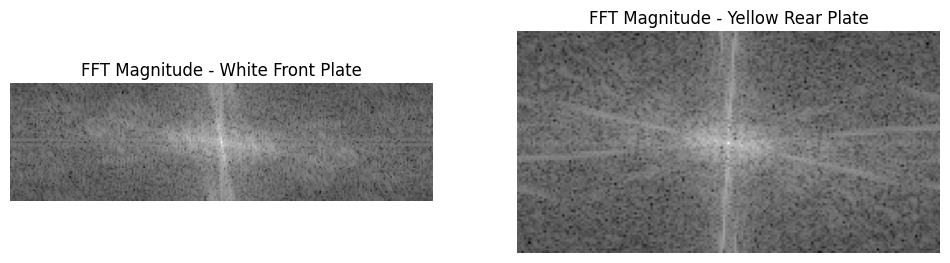

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute normalized FFT magnitude
def compute_fft_normalized(img_gray):
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    magnitude = 20 * np.log(np.abs(fshift) + 1)
    magnitude_norm = 255 * magnitude / np.max(magnitude)
    return magnitude_norm.astype(np.uint8)

# Compute FFT for both plates
white_fft = compute_fft_normalized(white_plate_gray)
yellow_fft = compute_fft_normalized(yellow_plate_gray)

# Display
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(white_fft, cmap='gray')
plt.title('FFT Magnitude - White Front Plate')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(yellow_fft, cmap='gray')
plt.title('FFT Magnitude - Yellow Rear Plate')
plt.axis('off')
plt.show()


#### (c) Implement a basic number plate localisation algorithm using edge detection and contour analysis.  


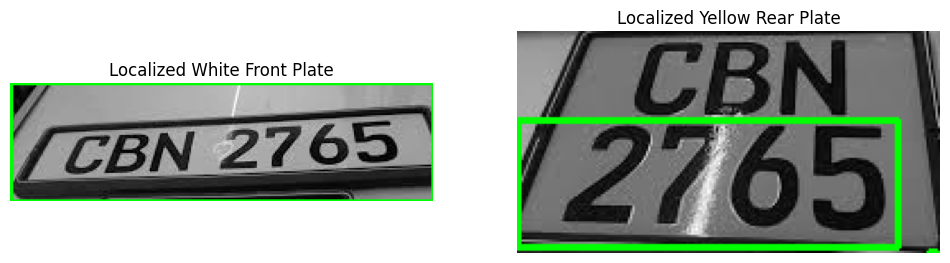

In [16]:
# Function to localise plate within its own cropped image
def localise_plate_cropped(img_gray):
    edges = cv2.Canny(img_gray, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h)
        if 2 < aspect_ratio < 6:
            cv2.rectangle(result, (x, y), (x+w, y+h), (0,255,0), 2)
    return result

# Apply localisation on cropped plates
white_loc = localise_plate_cropped(white_plate_gray)
yellow_loc = localise_plate_cropped(yellow_plate_gray)

# Display
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(white_loc)
plt.title('Localized White Front Plate')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(yellow_loc)
plt.title('Localized Yellow Rear Plate')
plt.axis('off')
plt.show()


#### (d) Discuss what the transforms reveal about the image structure, how Fourier and DCT analysis can help in number plate recognition, and potential applications for traffic optimisation.



**Fourier Transform Insights:**
- FFT highlights **high-frequency components**, which correspond to **edges and fine details** of characters on the number plates.
- Low-frequency components correspond to **background and plate region**, while high-frequency components capture **text and borders**.

**DCT Analysis:**
- Discrete Cosine Transform separates low-frequency (smooth areas) from high-frequency (characters) components.
- Useful for **feature extraction, compression**, and recognition algorithms.

**Applications for Number Plate Recognition and Traffic Optimisation:**
1. Automated recognition allows monitoring of **traffic patterns**, peak hours, and congestion in real-time.
2. Data can be used to **optimise bus and taxi schedules**, improving service efficiency.
3. Helps law enforcement track vehicles and manage parking.
4. Supports traffic flow analysis, enabling dynamic route planning or congestion mitigation strategies.

By applying these transforms to **cleanly cropped plates**, recognition algorithms can be more accurate, and the system can effectively assist in traffic management.